# Example 2D with 2 clusters, 1 class

In [1]:
# Import packages
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.datasets import make_classification

from Bias import bias_rotate_2D, BIASme
from Transformations import remove_outliers_lof, trafo_keep_axes
from full.DensityEstimators import DE_kde, DE_histogram
from IMITATE import IMITATE
import warnings
warnings.filterwarnings('ignore')

In [2]:
def generateData(dataset_size, loc=1):
    size = dataset_size // 2
    R_x = np.random.normal(loc=loc, scale=0.4, size=size)
    R_y = np.random.normal(loc=0, scale=0.4, size=size)
    R = np.append(R_x, R_y, axis=0).reshape(2, size).transpose()
    L_x = np.random.normal(loc=0, scale=0.4, size=size)
    L_y = np.random.normal(loc=0, scale=0.4, size=size)
    L = np.append(L_x, L_y, axis=0).reshape(2, size).transpose()
    data = np.concatenate((R, L))
    labels = np.array([1]*dataset_size)
    return data, labels

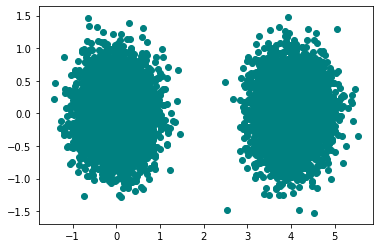

In [5]:
data, _ = generateData(10000, 4)
plt.scatter(data[:,0], data[:,1], c='teal')
plt.show()

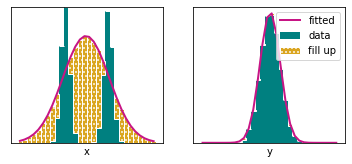

[27.306248422749928]

In [3]:
bias_gen = lambda a, b: (a,b)
data_gen = lambda size: generateData(10000, 4)
DE = lambda b: DE_kde(num_bins=b, kernel='gau')
bh = IMITATE([15], bias_gen, data_gen, repeat=1, DE=DE, trafo=trafo_keep_axes)
bh.fill_up(30, iterations=1, fill_up_plots=True, point_plots=False, RO=True)

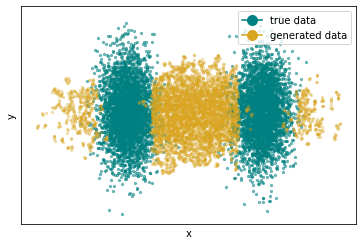

In [12]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.scatter(bh.D.X_b_train[:,0], bh.D.X_b_train[:,1], c='teal', alpha=0.5, label="true data", s=5)
ax.scatter(bh.added_points[:,0], bh.added_points[:,1], c='goldenrod', alpha=0.3, label="generated data", s=5)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
legend_elements = [Line2D([0], [0], color='teal', marker='o', label='true data', markersize=10),
                   Line2D([0], [0], marker='o', color='goldenrod', label='generated data', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right')
plt.show()
fig.savefig('Results/Example_cluster.pdf', format='pdf', dpi=1200, bbox_inches='tight')